# Conceptos básicos: regresión logística y descenso del gradiente en Python 

__Valentina Díaz Torres__


__Machine Learning-MDS__

## Introducción

El objetivo de esta práctica es calcular el descenso del gradiente, aplicándolo a una base de datos sobre notas, compuesta por tres columnas, donde las dos primeras son notas uno y dos y la tercera muestra un resultado binario, que indica si estas están aprobadas o no.

El descenso del gradiente es usado en técnicas de Machine Learning, tales como deeplearning para entrenar redes neuronales. En esto se  tienen en cuenta el error cuadrático medio, aplicado a la medición del error del modelo de aprendizaje automático en problemas de regresión. Pero también la función de coste a optimizar.

Pero entonces ¿qué es el gradiente?, es el conjunto de las derivadas parciales de la función de coste, que es aquella, que anteriormente dijimos que era el objetivo a optimizar en este caso. Esta optimización se hace mediante el descenso del gradiente, que encuentra los mejores coeficientes para minimizar la función de coste.

## Librerías

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

## Carga de datos

In [111]:
data = pd.read_csv("./data/4_1_data.csv")

In [112]:
pwd #comprobar que estaba en la ruta del directorio correcto

'C:\\Users\\ajrd9\\Desktop\\pracML'

## EDA y visualización de datos

In [113]:
data.head(), data.tail() #comprobar las 5 primeras y últimas filas

(     score-1    score-2  label
 0  34.623660  78.024693      0
 1  30.286711  43.894998      0
 2  35.847409  72.902198      0
 3  60.182599  86.308552      1
 4  79.032736  75.344376      1,
       score-1    score-2  label
 95  83.489163  48.380286      1
 96  42.261701  87.103851      1
 97  99.315009  68.775409      1
 98  55.340018  64.931938      1
 99  74.775893  89.529813      1)

In [114]:
data.size  #el data set se compone de un total de 300 variables

300

In [115]:
data.shape #el data set se compone de 100 filas y 3 columnas

(100, 3)

In [116]:
data.describe() # algunos valores estadísticos

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [117]:
data.info

<bound method DataFrame.info of       score-1    score-2  label
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
..        ...        ...    ...
95  83.489163  48.380286      1
96  42.261701  87.103851      1
97  99.315009  68.775409      1
98  55.340018  64.931938      1
99  74.775893  89.529813      1

[100 rows x 3 columns]>

In [118]:
data.isnull() #comprobamos que no hay ningún valor nulo

,score-1,score-2,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
95,False,False,False
96,False,False,False
97,False,False,False
98,False,False,False


In [119]:
scores = data[['score-1', 'score-2']].values #introducir los valores de score-1 y score-2, dentro del objeto scores
results = data['label'].values #el objeto results pasa a estar formado por los valores de label
#de este modo hemos creado dos objetos con los que podemos trabajar, que recogen todos los valores


In [120]:
passed = (results == 1).reshape(100, 1) #Almacenamos en la variable passed el nuevo array formado por todos los elementos de label que sean igual a 1, haciendo referencia a que estos serán los aprobados
failed = (results == 0).reshape(100, 1) #Almacenamos en la variable passed el nuevo array formado por todos los elementos de label que sean igual a 0, en este caso, estos serán los suspensos


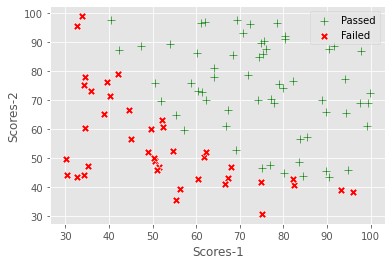

In [121]:
#Creación del gráfico para failed, mostrado en la gráfica con "+", en verd
#uso de la librería seaborn y matplotlib para el gráfico
ax = sns.scatterplot(x = scores[passed[:, 0], 0], #Seleccionamos los valores d de la columna score-1, todas las filas, desde la posición 0 hasta el final del array, de los que sean =1, es decir passed, anteriormente recogidos en scores.
                     y = scores[passed[:, 0], 1], #Seleccionamos los valores de la columna score-2, todas las filas, desde la posición 0 hasta el final del array.
                     marker = "+",
                     color = "green",
                     s = 60)
#Creación del gráfico para failed, mostrado en la gráfica con "x", en rojo
sns.scatterplot(x = scores[failed[:, 0], 0], #se seleccionan los valores igual que arriba, desde la posición 0, primero para la primera columna y luego para la segunda, pero ahora de los valores de failed
                y = scores[failed[:, 0], 1],
                marker = "X",
                color = "red",
                s = 60)

ax.set(xlabel="Scores-1", ylabel="Scores-2") #asignamos los nombres para las etiquetas de x e y
ax.legend(["Passed", "Failed"])#los nombres que se le atribuyen a la leyenda, aprobado y suspenso, que son lso valores representados.
#finalmente se reprensenta el gráfico con todo lo añadido anteriormente en conjunto.
plt.show(); 

## Definición de la función sigmoide

In [122]:
def logistic_function(x): #Definimos el método correspondiente a la función sigmoide  
    return 1/ (1 + np.exp(-x)) #introducción de la fórmula adjuntada

logistic_function(0) #comprobar el resultado cuando es 0
logistic_function(1) #comprobar el resultado cuando es 1
#la función sigmoide está acotada entre 0 y 1

0.7310585786300049

<img src = "https://www.diegocalvo.es/wp-content/uploads/2018/12/funcion-sigmoide.png" align="center" width="140">

## Computación de la función de coste y gradiente

El objetivo de esta función de regresión logística es minimizar la función de costes. Se hará uso de las siguientes fórmulas, siendo la primera la de la función de costes y la segunda la del gradiente.

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$





$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [123]:
def compute_cost(theta, x, y): #se define la función de coste, con theta, que es un array de np, del cual coge x e y .
    m = len(y) #m es definida con la longitud de y
    y_pred = logistic_function(np.dot(x , theta)) #np.dot devuelve el producto entre dos arrays. Por lo tanto, hace el producto entre x y theta y al resultado le aplica la función logística
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred)) #el error queda calculado como el producto de y por el logaritmo de y_pre, calculado antes+
    #el producto de 1-y por el logaritmo de 1-y_pred. Con esto quedaría calculado el error para la función de coste.
    cost = -1 / m * sum(error) #el coste se calcual con la fórmula de -1 entre m por la suma del error
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y)) #aquí se calcula el gradiente
    return cost[0] , gradient #Devuelve el valor de coste para la posición 0 y el gradiente.

## Inicialización  del coste y el gradiente

In [124]:
mean_scores = np.mean(scores, axis=0) #Calcula la media del array scores para el eje X
std_scores = np.std(scores, axis=0) #Calcula la desviación típica del array scores para el eje X
scores = (scores - mean_scores) / std_scores #Recoge en score la división entre scores menos su media, y la desviación típica

rows = scores.shape[0] #decimos que las filas son igual a la primera posición, o posición 0 de la "forma" de scores
cols = scores.shape[1] #las columnas son igual a la posición uno del resultado que devuelve shape
#si queremos comprobar qué contiene rows y cols encontraremos que efectivamente hay 100 rows y 2 col, por lo que se han
#creado un objeto de ambas para poder trabajar con rllas y aplicarlas a la fórmula

X = np.append(np.ones((rows, 1)), scores, axis=1) #Con la función append() introducimos nuevos valores en el array,
#mediante la función ones, nos devuelve un array de 100 filas (rows) y del tipo 1, utilizado anteriormente en el
#método shape, creando así el nuevo array scores para el eje Y.
y = results.reshape(rows, 1) #Almacenamos en y el nuevo formato para la columna results, siendo este de 100 filas del tipo 1

theta_init = np.zeros((cols + 1, 1)) #Con la función zeros() devuelve un array inicializado a 0 compuesto por columnas del tipo 1

cost, gradient = compute_cost(theta_init, X, y) #Almacena en cost y  gradient el resultado de aplicar el método
#compute_cost, pasándole por parámetro los valores theta_init, X e y. Por lo tanto, se le atribuyen nuevos valores a los parametros
#theta, x e y que habíamos definido en la función de coste. Cuando se ejecute, cost, pasaría a tomar el valor de cost de la función 
#de coste y lo mismo pasaría con gradient

print("Cost init:", round(cost,4)) #el valor del coste inicializado obtenido ha sido de 0.6931
print("Gradient init:", gradient)  #Muestra por pantalla el resultado del gradiente inicializado



Cost init: 0.6931
Gradient init: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Descenso del Gradiente

In [125]:
def gradient_descent(x, y, theta, alpha, iterations): #Definimos la función para calcular el descenso del gradiente, pásandole por parámetro todos los valores necesarios 
    costs = [] #Inicializamos el array costs sin valores en su interior
    for i in range(iterations): #Realizamos un bucle for para hacer un recorrido de todas las iteraciones que son recibidas por párametro
        cost, gradient = compute_cost(theta, x, y) #Almacena en cost y gradient el resultado de la llamada a la función compute_cost 
        theta = theta - (alpha * gradient) #Actualiza el valor de theta, con el valor de theta anterior menos el producto de alpha por el gradient
        costs.append(cost) #Añadimos a la lista costs la variable cost
    return theta, costs

#Entonces, la función del gradiente queda definida haciendo uso de un bucle, donde costs y theta se van
#actualizando con nuevos valores, cada uno con las directrices marcadas, ocmo ya se ha comentado anteriormente



In [126]:
theta, costs = gradient_descent(X, y, theta_init, 1, 200) #Almacenamos en thetea y costs la función del gradiente anteiormente definida
#aplicada a X, y, theta_init, alpha=1 y en 200 iteraciones


In [127]:
print("Theta after gradient descent:", theta) #es el valor de theta dspúes de ejecutar la función del descenso del gradiente
print("Resulting cost:", costs[-1]) #el resultado del coste

Theta after gradient descent: [[1.50850586]
 [3.5468762 ]
 [3.29383709]]
Resulting cost: 0.20489382036036602


## Representación de la convergencia entre la función de coste con el Descenso del Gradiente

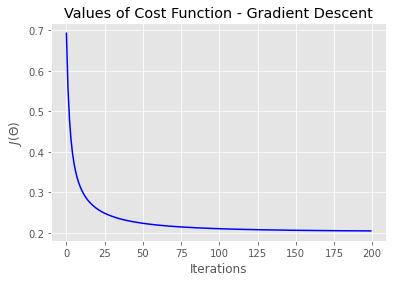

In [128]:
#Representación de la función de coste con el Descenso del Gradiente

plt.plot(costs,color='blue') #costs
plt.xlabel("Iterations")  #interacciones
plt.ylabel("$J(\Theta)$")  #theta
plt.title("Values of Cost Function - Gradient Descent");

## Representación de la frontera de decisión

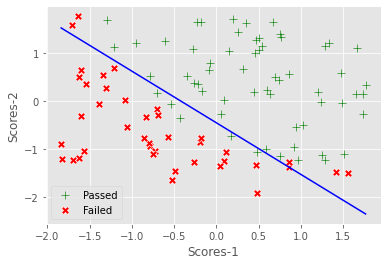

In [129]:
#al igual que en las primeras gráficas representadas representadas, se representan los
#aprobados por un lado y los suspensos por otro con + y x, en verde y rojo
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = "+",
                color = "green",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "X",
                    color = "red",
                    s = 60)
ax.legend(["Passed", "Failed"]) #nombre de la leyenda
ax.set(xlabel="Scores-1", ylabel="Scores-2") #nombres del eje x e y

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
#Almacenamos un array formado por los valores mínimos y máximos de la columna 2

y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2] #la frontera de y es el resultado de - theta de 
#Almacenamos un array formado por la suma de la posición 0 y 1 de theta por el producto de x_boundary entre la posición 2 del array theta  
sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show(); #plotear

## Predicción mediante el uso de los valores optimizados

In [130]:
#Se define la función de predicción, formada por los parametros de theta y x
#La función devuelve el resultado positivo del producto entre los arrays x y theta

def predict(theta, x):
    results = x.dot(theta)
    return results > 0

In [131]:
p = predict(theta, X) #Almacenamos en p el resultado de aplicar el método creado
print("Accuracy:", sum(p==y)[0],"%") #Si p e y son iguales, suma el contenido de la posición 0. El valor se muestra en porcentaje de precisión del modelo de training

Accuracy: 89 %


### Ejemplo introduciendo valores

In [132]:

test = np.array([50,80]) #a la función de test le damos valores a scores-1 y 2 de 40 y 80
test = (test - mean_scores)/std_scores #test devuelve el valor obtenido de test - la media de scores, entre la desviación típica
test = np.append(np.ones(1), test) #Añadimos una nueva columna a test inicializada con todos sus valores a 1
probability = logistic_function(test.dot(theta)) #Llamamos a la función logistic_function pasándole por parámetro el producto entre test y theta
print("A person who scores 50 and 80 on their scores",
      np.round(probability[0], 2),"probability of passing.")


A person who scores 50 and 80 on their scores 0.75 probability of passing.


### Referencias

https://www.iartificial.net/gradiente-descendiente-para-aprendizaje-automatico/

https://www.tutorialspoint.com/numpy/numpy_dot.htm

https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb

https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1

https://www.diegocalvo.es/funcion-de-activacion-redes-neuronales/

https://www.diegocalvo.es/funcion-de-coste-redes-neuronales/